<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/main/UEFA_Champions_League_2022_23_Best_Defender_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [2]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_gk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [3]:
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals ', 'ball recoveries',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [4]:
# Defining function to renaming multiple columns by index

def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

# Renaming columns using the function
new_column_mapping = {12: 'Offsides', 13: 'Crosses', 14: 'Interceptions', 15: 'Tackles won', 16: 'penalties won', 17: 'penalties comitted', 18: 'own goals', 19:'ball recoveries', 20:'Aerial Duels won', 21: 'Aerial Duels lost', 22: 'Aerial Duels won%'}
df_misc = rename_col_by_index(df_misc, new_column_mapping)
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object')


In [5]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [6]:
print(df_stdstats.columns)
df_stdstats= df_stdstats.rename(columns={'Pos': 'Position'})
print(df_stdstats.columns)

Index(['Player', 'Nationality', 'Pos', 'Club', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')
Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')


In [7]:
dfjoin_df = [df_defense, df_misc, df_passing, df_possession, df_goalsc, df_passtype]

# Merge DataFrames with an empty string as suffix for duplicates
import functools as ft

# Merge DataFrames with custom suffixes for duplicates
suffixes = ['_defense', '_misc', '_passing', '_possession', '_goalsc']

# Define a function to merge with a specific suffix
def merge_with_suffix(left, right, suffix):
    return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

# Use functools.partial to create a partially applied function
merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffixes[0])

# Apply the merge function iteratively to the list of DataFrames
df_df = ft.reduce(merge_with_suffix_partial, dfjoin_df[1:], dfjoin_df[0])

# Drop duplicate columns with original suffixes
columns_to_drop = [col for col in df_df.columns if col.endswith(('_defense', '_misc', '_passing', '_possession', '_goalsc', '_passtype'))]
df_df = df_df.drop(columns=columns_to_drop)

In [8]:
print(df_df.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'No. of players tackled', 'Tackles won', 'Tackles (Def 3rd)',
       ...
       'Passes from Free kicks', 'Through balls', 'Switches',
       'Throw-ins taken', 'Corner kicks', 'Inswinging Corner kicks',
       'Outswinging Corner kicks', 'Straight Corner kicks', 'Passes completed',
       'Passes offside'],
      dtype='object', length=110)


In [9]:
cb_metrics = [
    'SCA(Def)', 'penalties comitted', 'own goals', 'Tackles won', 'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)', '% of dribblers successfully tackled', 'challenges lost', 'Blocks', 'Shots blocked',
    'Passes blocked', 'Interceptions', 'Clearances', 'Errors', 'Touches (Def 3rd)',
    'Touches (Mid 3rd)', 'Miscontrols', 'Dispossessed', 'Passes received',
    'Passes completed (short)', 'Passes completed (short) %', 'Passes completed (medium)',
    'Passes completed (medium) %', 'Touches (Def Pen)', 'Aerial Duels won',
    'Aerial Duels won%', 'Progressive passing distance'
]

fb_metrics = [
    'SCA/90',
    'Tackles (Def 3rd)',
    'Tackles (Mid 3rd)',
    'Tackles (Att 3rd)',
    'No. of dribblers tackled',
    'Dribbles challenged (total)',
    'Passes blocked',
    'Interceptions',
    'Touches (Mid 3rd)',
    'Touches (Att 3rd)',
    'Take-ons completed',
    'Times tackled during takeon',
    'Progressive carries',
    'Carries into final third',
    'Carries into penalty area',
    'Progressive passes received',
    'Switches',
    'Assists',
    'Expected Assist Goals (xAG)',
    'xA',
    'Key Passes',
    'Passes into Final third',
    'Passes into Penalty Area',
    'Crosses into Penalty Area',
    'Progressive passes'
]

In [10]:
def process_player_data(df, position, metrics):
    """
    Filters and processes player data for a given position.

    Args:
    df (DataFrame): The input DataFrame containing player data.
    position (str): The position of players to filter (e.g., 'DF').
    metrics (list): List of metrics/columns to include in the output.

    Returns:
    DataFrame: Processed DataFrame for the given position.
    """
    # Filter and fill missing values

    # Filter the DataFrame based on position and select relevant columns
    df_filtered = df[df['Position'] == position][['Player', 'Position', 'Club'] + metrics]

    # Handle missing values
    df_filtered.fillna(0, inplace=True)

    return df_filtered

# Usage
df_cb = process_player_data(df_df, 'DF', cb_metrics)
display(df_cb)
df_fb = process_player_data(df_df, 'DF', fb_metrics)
display(df_fb)

,Player,Position,Club,SCA(Def),penalties comitted,own goals,Tackles won,Tackles (Def 3rd),Tackles (Mid 3rd),% of dribblers successfully tackled,...,Dispossessed,Passes received,Passes completed (short),Passes completed (short) %,Passes completed (medium),Passes completed (medium) %,Touches (Def Pen),Aerial Duels won,Aerial Duels won%,Progressive passing distance
3,Francesco Acerbi,DF,Inter,0,0,0,8,8,2,57.1,...,0,439,172,89.5,315,92.7,90,25,54.3,3420
10,Manuel Akanji,DF,Manchester City,0,1,0,16,10,15,53.8,...,1,701,332,95.8,396,94.7,38,10,43.5,4176
11,Nathan Aké,DF,Manchester City,1,0,0,6,3,6,60.0,...,1,506,278,97.1,250,91.6,26,14,93.3,3327
12,David Alaba,DF,Real Madrid,0,0,0,3,2,5,41.7,...,2,394,234,93.6,188,87.8,58,2,20.0,2043
14,Jordi Alba,DF,Barcelona,0,0,0,0,0,0,0.0,...,2,149,102,94.1,58,89.7,5,0,0.0,848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Josh Wilson-Esbrand,DF,Manchester City,0,0,0,1,1,0,100.0,...,0,31,21,90.5,11,81.8,0,1,100.0,65
712,Maximilian Wöber,DF,RB Salzburg,0,0,0,6,6,2,60.0,...,1,29,25,56.0,29,44.8,8,6,60.0,326
713,Marius Wolf,DF,Dortmund,0,1,0,3,1,1,50.0,...,1,80,55,85.5,29,75.9,7,2,66.7,294
716,Rıdvan Yılmaz,DF,Rangers,0,0,0,0,1,0,0.0,...,1,31,29,89.7,16,75.0,6,0,0.0,287


,Player,Position,Club,SCA/90,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),No. of dribblers tackled,Dribbles challenged (total),Passes blocked,...,Progressive passes received,Switches,Assists,Expected Assist Goals (xAG),xA,Key Passes,Passes into Final third,Passes into Penalty Area,Crosses into Penalty Area,Progressive passes
3,Francesco Acerbi,DF,Inter,0.68,8,2,0,4,7,6,...,1,2,0,0.1,0.1,1,31,0,0,29
10,Manuel Akanji,DF,Manchester City,1.90,10,15,2,14,26,12,...,8,7,0,0.4,0.7,4,55,2,0,44
11,Nathan Aké,DF,Manchester City,1.04,3,6,3,3,5,1,...,9,5,0,0.3,0.4,2,72,2,1,54
12,David Alaba,DF,Real Madrid,1.64,2,5,1,5,12,4,...,26,0,0,0.6,1.4,8,23,3,2,19
14,Jordi Alba,DF,Barcelona,4.32,0,0,0,0,1,1,...,23,0,1,0.6,1.0,5,22,5,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Josh Wilson-Esbrand,DF,Manchester City,1.96,1,0,0,1,1,0,...,6,0,0,0.0,0.0,0,0,2,0,2
712,Maximilian Wöber,DF,RB Salzburg,2.73,6,2,1,3,5,2,...,9,0,1,0.7,0.4,3,3,2,1,4
713,Marius Wolf,DF,Dortmund,1.53,1,1,1,2,4,3,...,13,0,0,0.1,0.2,1,3,2,1,3
716,Rıdvan Yılmaz,DF,Rangers,2.00,1,0,0,0,2,0,...,4,0,0,0.0,0.1,1,2,1,1,5


<ipython-input-11-fc8f40eb4198>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cb.corr()


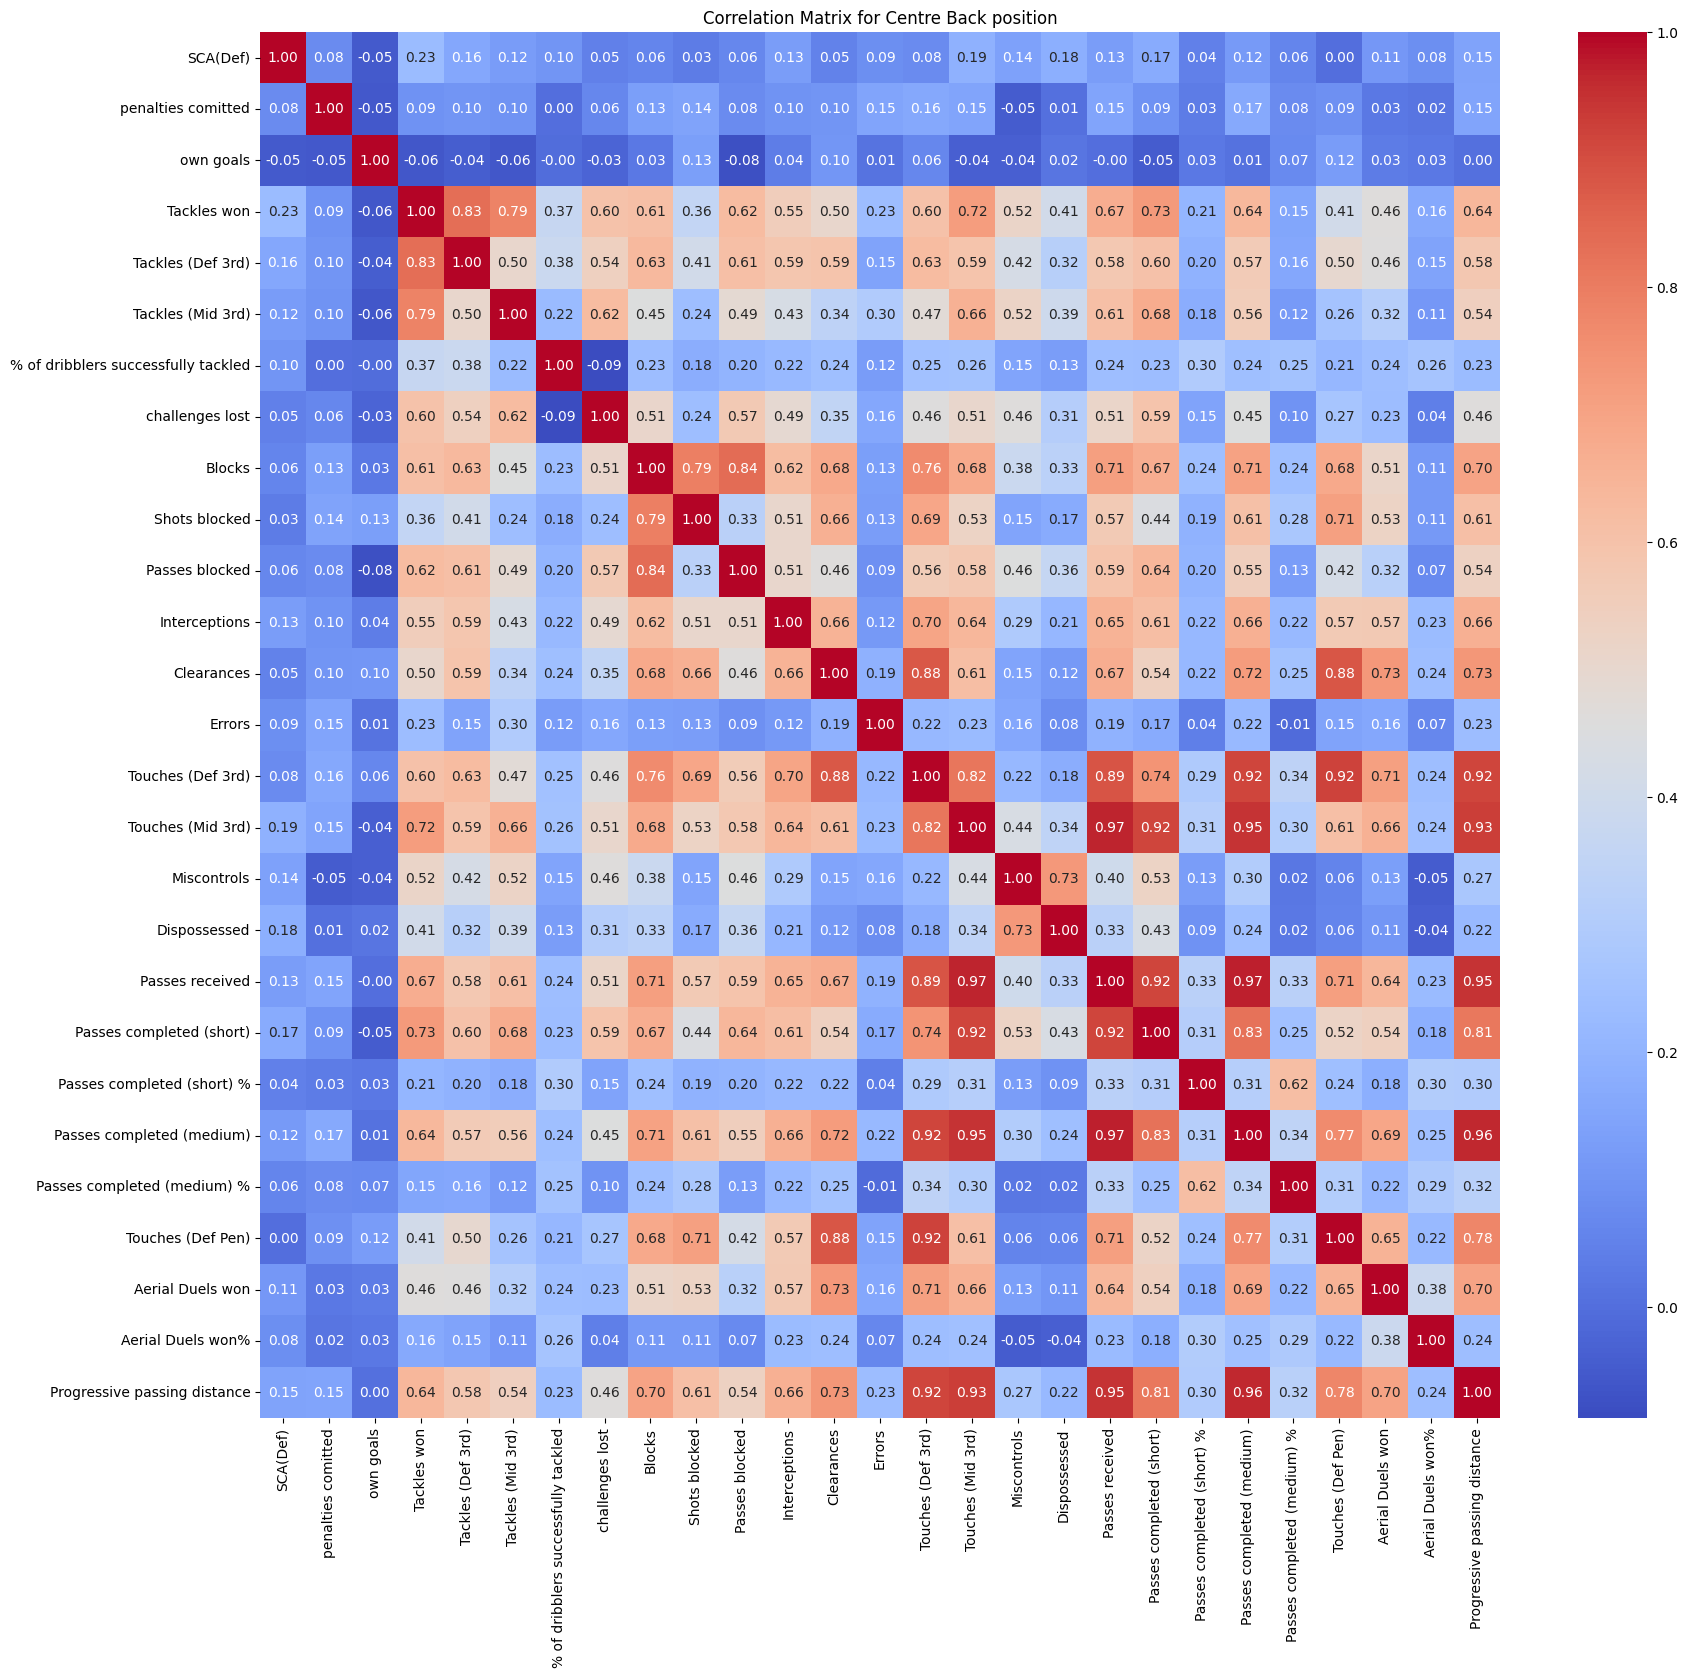

None

In [11]:
#visualization for correlation
def plot_correlation_matrix(data, position_title):
    corr_matrix = df_cb.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {position_title} position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_cb, 'Centre Back'))

<ipython-input-11-fc8f40eb4198>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cb.corr()


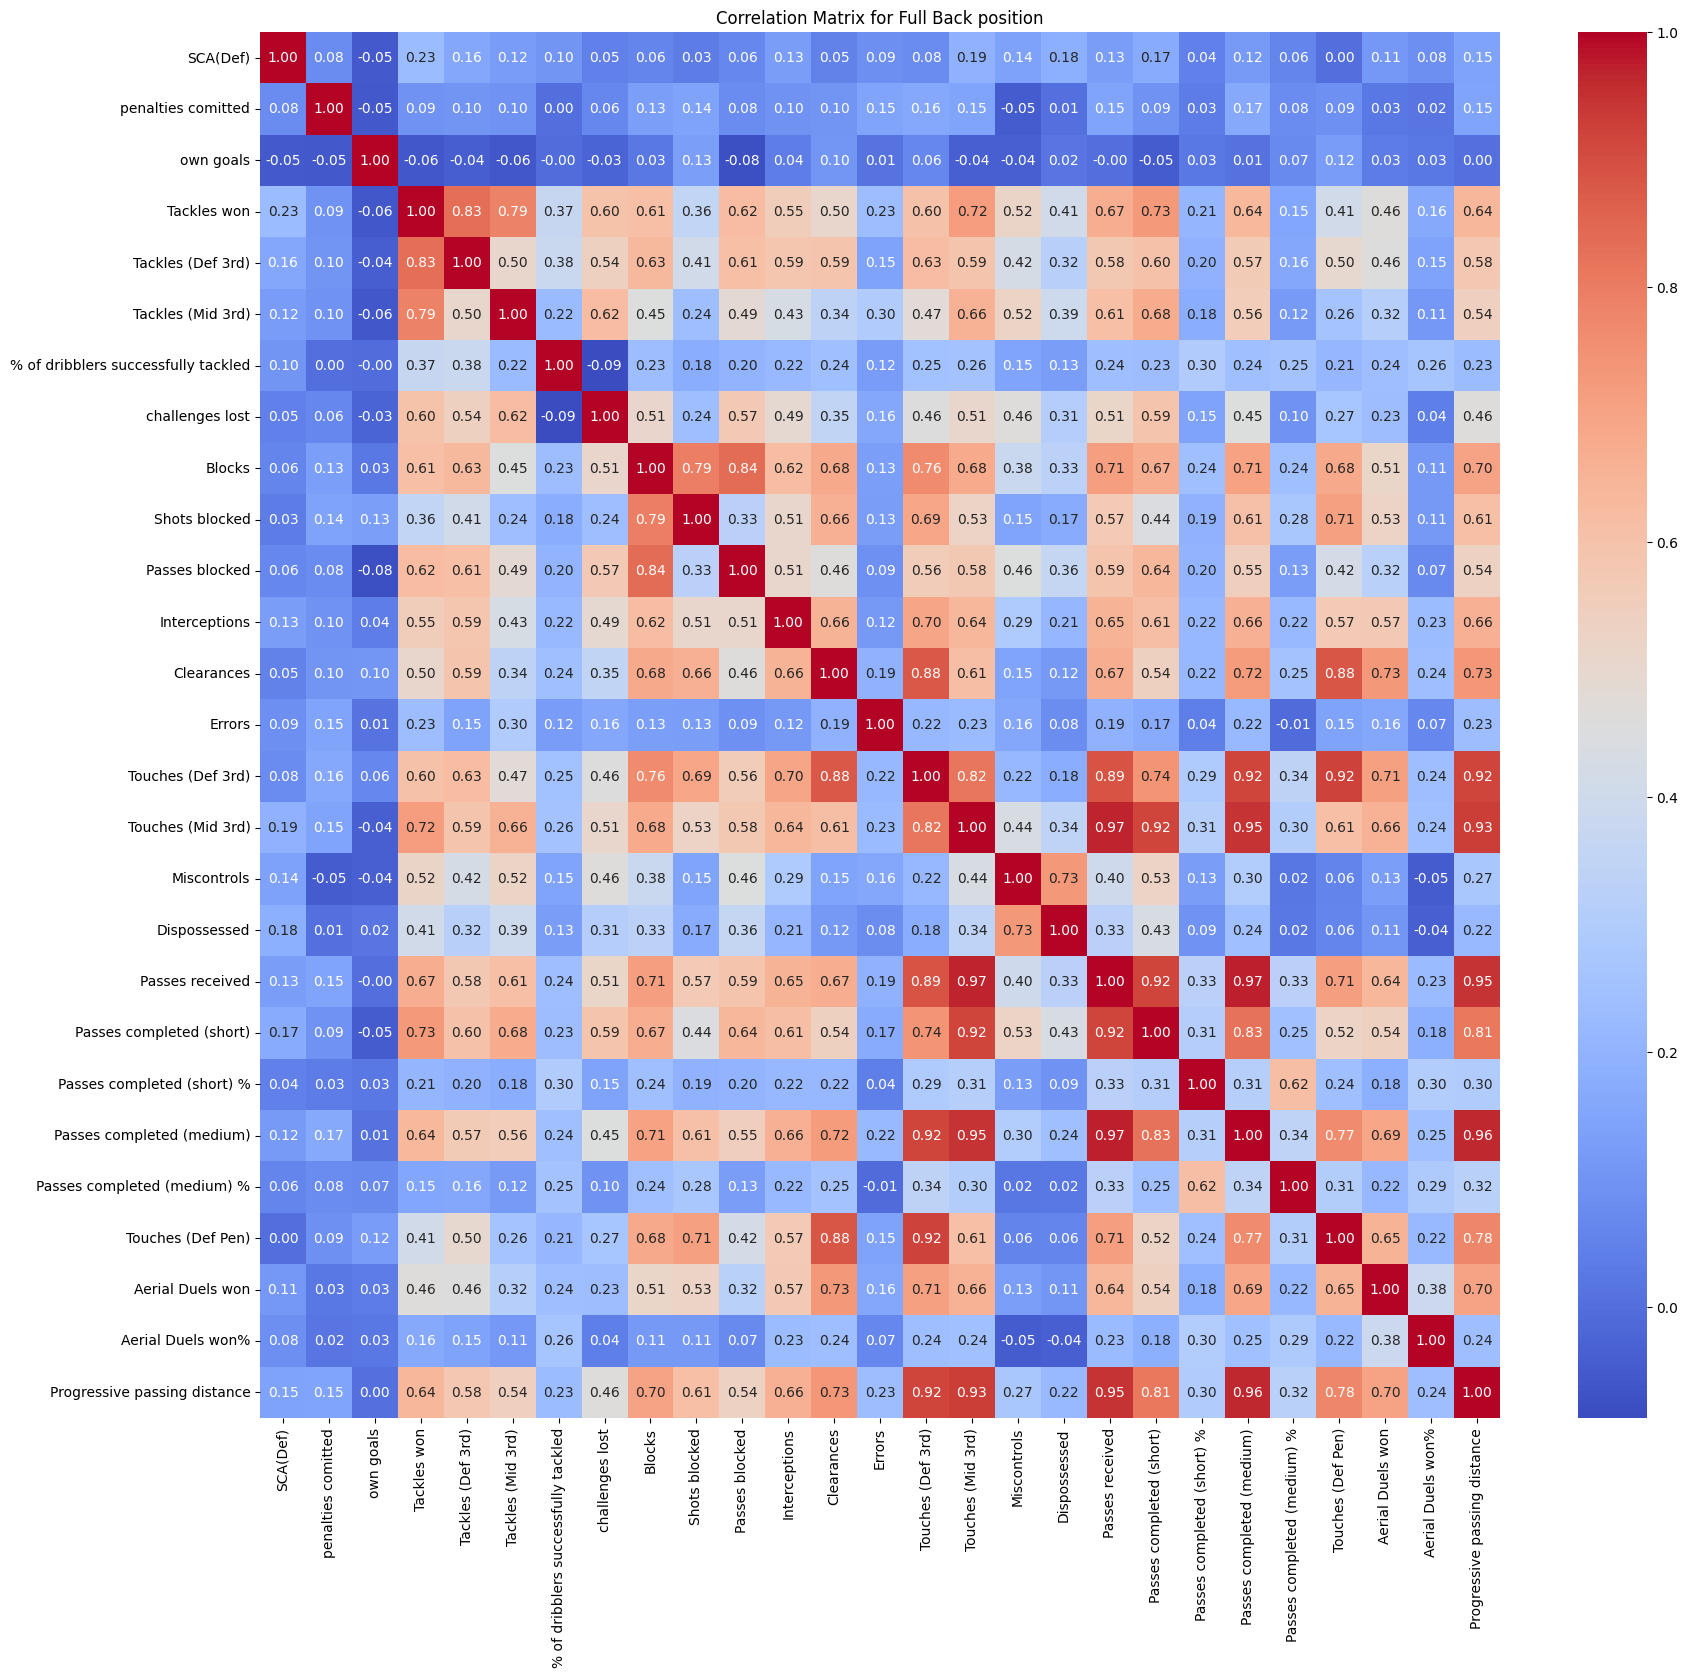

None

In [12]:
# Usage
display(plot_correlation_matrix(df_fb, 'Full Back'))

In [24]:
# Define the metrics for analysis
cb_metrics_for_analysis = df_cb.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_cb = df_cb.reset_index(drop=True)

In [25]:
# Define the metrics for analysis
fb_metrics_for_analysis = df_fb.columns.difference(['Player', 'Position', 'Club'])

# Reset index for continuity
df_fb = df_fb.reset_index(drop=True)

In [26]:
def normalize_dataframe(df, metrics):
    df_normalized = df.copy()
    df_normalized[metrics] = (df_normalized[metrics] - df_normalized[metrics].min()) / (df_normalized[metrics].max() - df_normalized[metrics].min())
    return df_normalized

# Normalize the dataframes
df_cb_normalized = normalize_dataframe(df_cb, cb_metrics)
df_cb_weighted = df_cb_normalized.reset_index(drop=True)


In [27]:
#Function for Normalizing and Applying Weights
def normalize_and_weight(df, metrics, weights):
    # Normalize metrics
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        df[metric] = (df[metric] - min_val) / (max_val - min_val)

    # Apply weights
    for metric in metrics:
        if metric in weights:
            df[metric] *= weights[metric]

    return df

In [28]:
#Function for Standard Scaling
from sklearn.preprocessing import StandardScaler

def standard_scale(df, metrics):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[metrics])
    scaled_df = pd.DataFrame(scaled_data, columns=metrics)
    scaled_df[['Player', 'Position', 'Club']] = df[['Player', 'Position', 'Club']]
    return scaled_df

In [29]:
# Define weights for each metric for CB position
cb_metric_weights = {
    'SCA(Def)': 12,
    'penalties comitted': -8,
    'own goals': -9,
    'ball recoveries': 12,
    'Tackles won': 15,
    'Tackles (Def 3rd)': 12,
    'Tackles (Mid 3rd)': 14,
    '% of dribblers successfully tackled': 10,
    'challenges lost': -7,
    'Blocks': 10,
    'Shots blocked': 12,
    'Passes blocked': 8,
    'Interceptions': 20,
    'Clearances': 15,
    'Errors': -8,
    'Touches (Def 3rd)': 11,
    'Touches (Mid 3rd)': 10,
    'Miscontrols': -7,
    'Dispossessed': -7,
    'Passes received': 8,
    'Passes completed (short)': 8,
    'Passes completed (short) %': 8,
    'Passes completed (medium)': 5,
    'Passes completed (medium) %': 5,
    'Touches (Def Pen)': 5,
    'Aerial Duels won': 12,
    'Aerial Duels won%': 12,
    'Progressive passing distance': 8
}

In [30]:
# Define weights for each metric for FB position
fb_metric_weights = {
    'SCA/90': 8,
    'Tackles (Def 3rd)': 4,
    'Tackles (Mid 3rd)': 6,
    'Tackles (Att 3rd)': 4,
    'No. of dribblers tackled': 3,
    'Dribbles challenged (total)': 3,
    'Passes blocked': 4,
    'Interceptions': 10,
    'Touches (Mid 3rd)': 6,
    'Touches (Att 3rd)': 4,
    'Take-ons completed': 4,
    'Times tackled during takeon': 3,
    'Progressive carries': 10,
    'Carries into final third': 8,
    'Carries into penalty area': 4,
    'Progressive passes received': 8,
    'Switches': 4,
    'Assists': 8,
    'Expected Assist Goals (xAG)': 6,
    'xA': 8,
    'Key Passes': 10,
    'Passes into Final third': 6,
    'Passes into Penalty Area': 6,
    'Crosses into Penalty Area': 4,
    'Progressive passes': 10
}

In [31]:
#Applying both methods for data processing
# For Centre Backs
df_cb_normalized_weighted = normalize_and_weight(df_cb.copy(), cb_metrics, cb_metric_weights)
df_cb_standardized = standard_scale(df_cb, cb_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_cb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_cb_normalized_weighted.head())

Standard Scaler DataFrame:
   SCA(Def)  penalties comitted  own goals  Tackles won  Tackles (Def 3rd)  \
0 -0.344921           -0.356506  -0.150414     1.024572           0.954388   
1 -0.344921            2.421785  -0.150414     3.201336           1.475383   
2  2.343081           -0.356506  -0.150414     0.480381          -0.348098   
3 -0.344921           -0.356506  -0.150414    -0.335905          -0.608595   
4 -0.344921           -0.356506  -0.150414    -1.152192          -1.129590   

   Tackles (Mid 3rd)  % of dribblers successfully tackled  challenges lost  \
0          -0.167047                             0.151152         0.105466   
1           4.999111                             0.046744         3.214420   
2           1.422540                             0.242904        -0.239973   
3           1.025143                            -0.336084         1.487224   
4          -0.961841                            -1.655417        -0.585413   

     Blocks  Shots blocked  ...  Pa

In [32]:
# For Full Backs
df_fb_normalized_weighted = normalize_and_weight(df_fb.copy(), fb_metrics, fb_metric_weights)
df_fb_standardized = standard_scale(df_fb, fb_metrics)

# Display first few rows for comparison
print("Standard Scaler DataFrame:")
print(df_fb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_fb_normalized_weighted.head())

Standard Scaler DataFrame:
     SCA/90  Tackles (Def 3rd)  Tackles (Mid 3rd)  Tackles (Att 3rd)  \
0 -0.485831           0.954388          -0.167047          -0.566967   
1  0.430779           1.475383           4.999111           1.623366   
2 -0.215356          -0.348098           1.422540           2.718533   
3  0.235436          -0.608595           1.025143           0.528200   
4  2.248971          -1.129590          -0.961841          -0.566967   

   No. of dribblers tackled  Dribbles challenged (total)  Passes blocked  \
0                  0.061512                     0.090185        1.309970   
1                  3.019341                     3.428587        3.694292   
2                 -0.234271                    -0.261226       -0.676964   
3                  0.357295                     0.968712        0.515196   
4                 -1.121619                    -0.964047       -0.676964   

   Interceptions  Touches (Mid 3rd)  Touches (Att 3rd)  ...  \
0       1.519312    

In [36]:
def calculate_top_players(df, metrics):
    """
    Calculate and return the top n players based on total score.

    :param df: DataFrame containing player data
    :param metrics: list of metric columns to consider for total score
    :param top_n: number of top players to return
    :return: DataFrame with top n players
    """
    # Calculate total score
    df['total_score'] = df[metrics].sum(axis=1)

    # Sort by total score in descending order
    return df.sort_values(by='total_score', ascending=False)

# Calculate top CBs using Standard Scaler
top_cb_standardized = calculate_top_players(df_cb_standardized, cb_metrics_for_analysis)

# Calculate top CBs using Weighted Metrics
top_cb_weighted = calculate_top_players(df_cb_normalized_weighted, cb_metrics_for_analysis)

# Display the top 5 centre backs for each method
print("Top 5 Centre Backs - StandardScaler Method:")
print(top_cb_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Centre Backs - Weighted Metrics Method:")
print(top_cb_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Centre Backs - StandardScaler Method:
             Player Position             Club  total_score
58       Rúben Dias       DF  Manchester City    51.235684
1     Manuel Akanji       DF  Manchester City    46.347375
87   Theo Hernández       DF            Milan    40.990783
206   Fikayo Tomori       DF            Milan    35.943588
138     Kim Min-jae       DF           Napoli    35.320873

Top 5 Centre Backs - Weighted Metrics Method:
                 Player Position             Club  total_score
58           Rúben Dias       DF  Manchester City   154.185361
138         Kim Min-jae       DF           Napoli   142.144431
148    Nicolás Otamendi       DF          Benfica   125.594456
18   Alessandro Bastoni       DF            Inter   121.872194
1         Manuel Akanji       DF  Manchester City   120.720097


In [35]:
# Calculate top FBs using Standard Scaler
top_fb_standardized = calculate_top_players(df_fb_standardized, fb_metrics_for_analysis)

# Calculate top FBs using Weighted Metrics
top_fb_weighted = calculate_top_players(df_fb_normalized_weighted, fb_metrics_for_analysis)

# Display the top 5 fullbacks for each method
print("Top 5 Fullbacks - StandardScaler Method:")
print(top_fb_standardized[['Player', 'Position', 'Club', 'total_score']].head(5))

print("\nTop 5 Fullbacks - Weighted Metrics Method:")
print(top_fb_weighted[['Player', 'Position', 'Club', 'total_score']].head(5))

Top 5 Fullbacks - StandardScaler Method:
                 Player Position           Club  total_score
76        Álex Grimaldo       DF        Benfica    82.170474
57  Giovanni Di Lorenzo       DF         Napoli    69.866057
51      Alphonso Davies       DF  Bayern Munich    57.706631
61     Federico Dimarco       DF          Inter    56.842740
87       Theo Hernández       DF          Milan    56.333923

Top 5 Fullbacks - Weighted Metrics Method:
                 Player Position     Club  total_score
76        Álex Grimaldo       DF  Benfica   106.157065
57  Giovanni Di Lorenzo       DF   Napoli    99.810959
61     Federico Dimarco       DF    Inter    85.833747
87       Theo Hernández       DF    Milan    80.070360
18   Alessandro Bastoni       DF    Inter    79.853580


In [38]:
# Linear transformation function
def linear_transform(x, min_x, max_x, new_min, new_max):
    return (x - min_x) / (max_x - min_x) * (new_max - new_min) + new_min

def combine_and_select_top_players(df_standardized, df_weighted, original_df, metrics, top_n=5):
    """
    Combine scores from standardized and weighted data, and select top n players.

    :param df_standardized: DataFrame with standardized scores
    :param df_weighted: DataFrame with weighted scores
    :param original_df: Original DataFrame with player details
    :param metrics: list of metric columns
    :param top_n: number of top players to return
    :return: DataFrame with top n players based on combined score
    """
    # Find the min and max values for linear transformation
    min_standardized = df_standardized['total_score'].min()
    max_standardized = df_standardized['total_score'].max()
    min_weighted = df_weighted['total_score'].min()
    max_weighted = df_weighted['total_score'].max()

    # Apply linear transformation
    df_weighted['total_score_transformed'] = df_weighted['total_score'].apply(
        lambda x: linear_transform(x, min_weighted, max_weighted, min_standardized, max_standardized)
    )

    # Combine scores
    combined_df = original_df.copy()
    combined_df['score'] = (df_standardized['total_score'] + df_weighted['total_score_transformed']) / 2

    # Select and return top players
    return combined_df.sort_values(by='score', ascending=False)

# Use the function for Centre Backs
top_cb = combine_and_select_top_players(top_cb_standardized, top_cb_weighted, df_cb, cb_metrics_for_analysis)
print("Top 5 Centre Backs:")
print(top_cb[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Centre Backs:
                 Player             Club Position      score
58           Rúben Dias  Manchester City       DF  51.235684
138         Kim Min-jae           Napoli       DF  39.892424
1         Manuel Akanji  Manchester City       DF  39.381249
148    Nicolás Otamendi          Benfica       DF  34.039829
18   Alessandro Bastoni            Inter       DF  33.748291


In [39]:
# Use the function for Full Backs
top_fb = combine_and_select_top_players(top_fb_standardized, top_fb_weighted, df_fb, fb_metrics_for_analysis)
print("Top 5 Full Backs:")
print(top_fb[['Player', 'Club', 'Position', 'score']].head(5))

Top 5 Full Backs:
                 Player           Club Position      score
76        Álex Grimaldo        Benfica       DF  82.170474
57  Giovanni Di Lorenzo         Napoli       DF  72.946300
61     Federico Dimarco          Inter       DF  59.668680
87       Theo Hernández          Milan       DF  56.624383
51      Alphonso Davies  Bayern Munich       DF  55.349835


In [40]:
def plot_top_players(df, top_n, position_title, x_label='score', y_label='Player'):
    """
    Create a bar plot for the top N players based on their score.

    :param df: DataFrame containing players and their scores.
    :param top_n: Number of top players to display.
    :param position_title: Title of the position (e.g., 'Centre Backs').
    :param x_label: Label for the x-axis.
    :param y_label: Label for the y-axis.
    """
    top_players = df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")
    plt.title(f'Top {top_n} {position_title} by {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<ipython-input-40-1d955e4bc1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


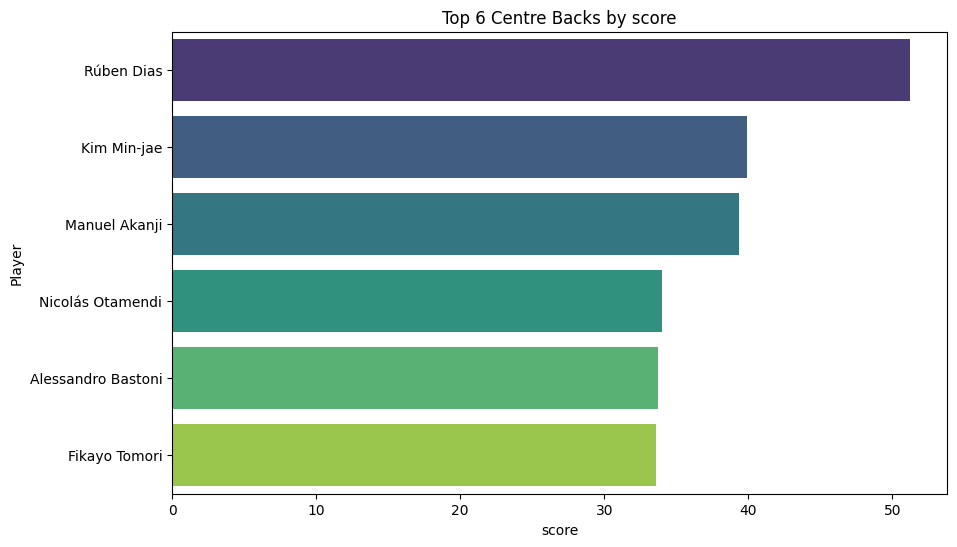

In [42]:
plot_top_players(top_cb, 6, 'Centre Backs')

<ipython-input-40-1d955e4bc1eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_label, y=y_label, data=top_players, palette="viridis")


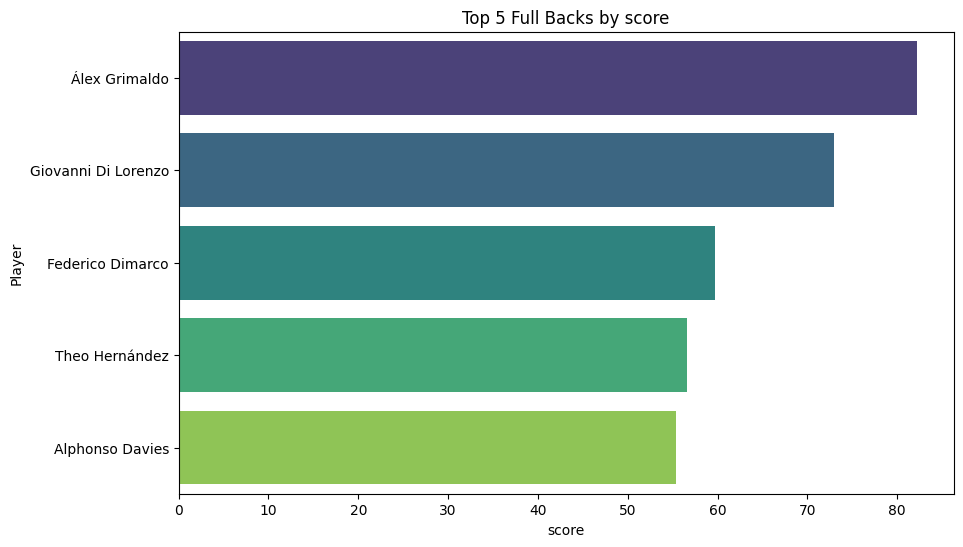

In [44]:
plot_top_players(top_fb, 5, 'Full Backs')

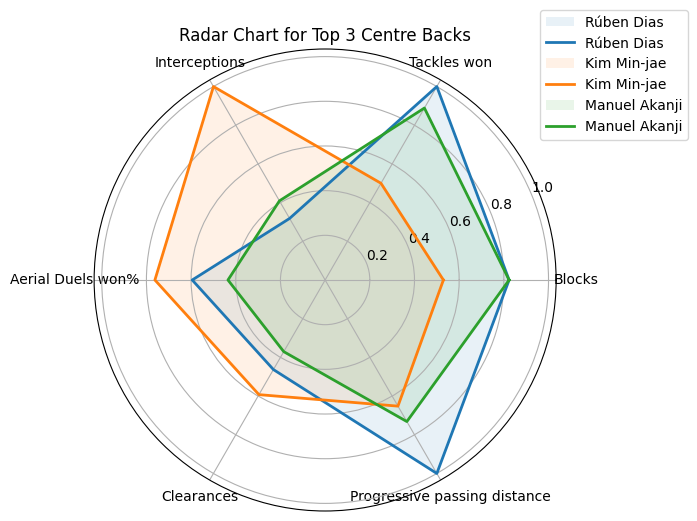

In [47]:
from sklearn.preprocessing import MinMaxScaler

def plot_radar_chart(df, position_title, metrics, top_n=3):
    # Select the top N players
    top_players = df.head(top_n)

    # Extracting the metrics data for scaling
    data_for_scaling = df[metrics]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the data
    scaled_data = scaler.fit_transform(data_for_scaling)

    # Create a DataFrame for the scaled data
    df_scaled = pd.DataFrame(scaled_data, columns=metrics, index=df.index)

    # Now, select the scaled data for the top N players
    top_n_scaled_data = df_scaled.loc[top_players.index]

    # Radar chart setup
    num_metrics = len(metrics)
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    # Data for radar chart (adding the first metric at the end to close the chart)
    top_n_scaled_data = pd.concat([top_n_scaled_data, top_n_scaled_data.iloc[:, 0]], axis=1)

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i in range(len(top_players)):
        ax.fill(angles, top_n_scaled_data.iloc[i].values, alpha=0.1, label=top_players.iloc[i]['Player'])
        ax.plot(angles, top_n_scaled_data.iloc[i].values, label=top_players.iloc[i]['Player'], linewidth=2)

    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title(f'Radar Chart for Top {top_n} {position_title}')

    plt.show()

# Usage for Centre Backs
plot_radar_chart(top_cb, 'Centre Backs', ['Blocks', 'Tackles won', 'Interceptions', 'Aerial Duels won%', 'Clearances', 'Progressive passing distance'], top_n=3)

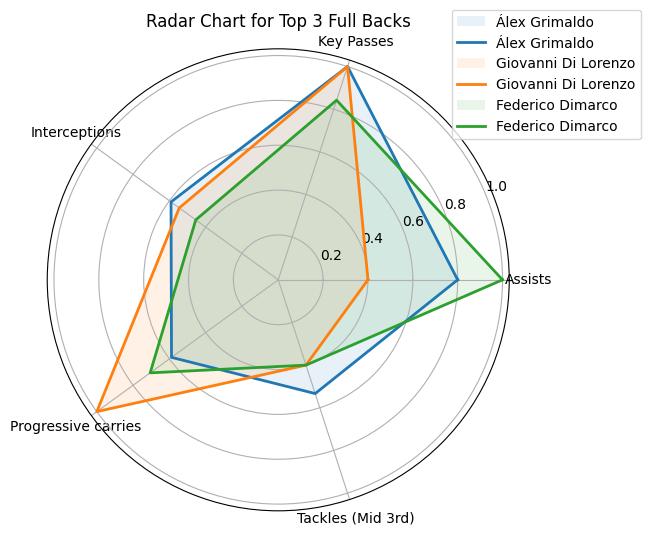

In [48]:
# Plot radar chart usage for Full Backs
plot_radar_chart(top_fb, 'Full Backs', ['Assists', 'Key Passes', 'Interceptions', 'Progressive carries', 'Tackles (Mid 3rd)'], top_n=3)

In [50]:
def select_top_2_players(df, position):
    # Assuming 'score' is the column representing the performance score
    top_2_players = df[df['Position'] == position].nlargest(2, 'score')
    return top_2_players[['Player', 'Club', 'Position', 'score']]

# Example usage for Centre Backs (CB)
top_2_cb = select_top_2_players(top_cb, 'DF')
print("Top 2 Centre Backs:")
print(top_2_cb)

# Example usage for Full Backs (FB)
top_2_fb = select_top_2_players(top_fb, 'DF')
print("\nTop 2 Full Backs:")
print(top_2_fb)

Top 2 Centre Backs:
          Player             Club Position      score
58    Rúben Dias  Manchester City       DF  51.235684
138  Kim Min-jae           Napoli       DF  39.892424

Top 2 Full Backs:
                 Player     Club Position      score
76        Álex Grimaldo  Benfica       DF  82.170474
57  Giovanni Di Lorenzo   Napoli       DF  72.946300
